In [17]:
cols = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome']

num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat_cols = [i for i in cols if i not in num_cols]

In [25]:
import pandas as pd
df = pd.read_csv('../week3/bank-full.csv', sep=';')
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_2867/1387178047.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'yes': 1, 'no': 0})


In [26]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

# Question 1:
**Answer**: duration

In [31]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score


for col in num_cols:
    if roc_auc_score(df['y'],df[col]) < 0.5: 
        print ('%s %.3f' % (col, roc_auc_score(df['y'],-df[col])))
    else:
        print ('%s %.3f' % (col, roc_auc_score(df['y'],df[col])))

age 0.508
balance 0.590
day 0.527
duration 0.808
campaign 0.572
pdays 0.593
previous 0.602


# Question 2
**Answer**: 0.89

In [35]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

dv = DictVectorizer(sparse=False)

train_dict = df_train[cat_cols + num_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [36]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [37]:
val_dict = df_val[cat_cols + num_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.9004159581551736)

# Question 3
**Answer**: 0.265

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    scores.append((t, p, r))


/tmp/ipykernel_2867/1280342905.py:18: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


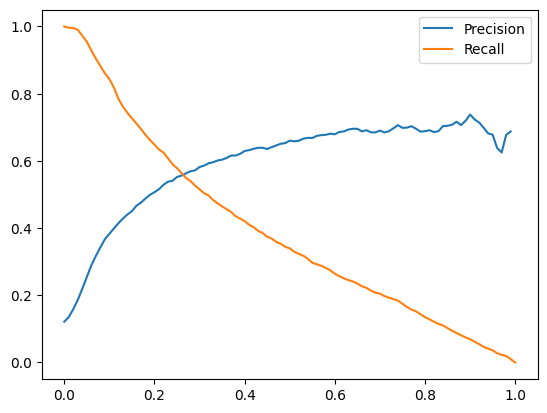

In [48]:
columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)


plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()

# Question 4
**Answer** 0.22

In [53]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    f1 = 2 * (p*r / (p+r))
    scores.append((t, p, r, f1))


/tmp/ipykernel_2867/3481959426.py:18: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [54]:
columns = ['threshold', 'precision', 'recall', 'f1_score']
df_scores = pd.DataFrame(scores, columns = columns)

max_f1_score = df_scores['f1_score'].max()
print(max_f1_score)
df_scores[df_scores['f1_score'] == max_f1_score].threshold

0.5728601252609603


22    0.22
Name: threshold, dtype: float64

# Question 5
**Answer**

In [55]:
from sklearn.model_selection import KFold

model = KFold(n_splits=5, shuffle=True, random_state=1)